# Task 1: Prediction Using Supervised ML

### Submitted By: Shivani Jadhav

# Simple Linear Regression
Simple Linear Regression is an approach for predicting a quantitative response "Y" on the basis of a single predictor variable "X".
It assumes that there is approximately a Linear Relationship between X and Y.
### Aim:
To predict the Scores of students given the number of Hours studdied using Simple Linear Regression
### Data Description: 
The dataset consist of two variables: Independent Variable-->Hours and Dependent Variable-->Scores


### Importing the required libraries

In [1]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset into Dataframe

In [2]:
## Reading data from a link using variable "url"

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [3]:
## Loading the data into Dataframe object df

df=pd.read_csv(url)
df.head()            #To display the first 5 rows of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [4]:
## Displays the number of rows and Columns in Dataset

df.shape

(25, 2)

In [5]:
## Gives information about the "Type" of variables , presence of null values if , memory usage etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [6]:
## Give the statistical information of variables

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


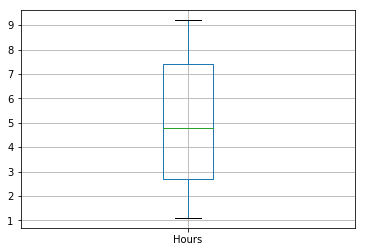

In [7]:
## Graphical representation of Quartiles using BoxPlot

df.boxplot(column="Hours")

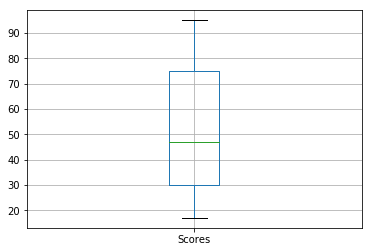

In [8]:
df.boxplot(column="Scores")

#### From the above graph we understand there's no presence of Outliers in the data

#### The following Pairplot from seaborn library shows the Linear relationship between the two variables

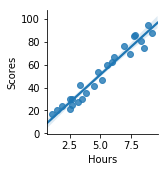

In [9]:
sns.pairplot(df,x_vars="Hours",y_vars="Scores",kind="reg")

### Splitting the Dataset into Train and Test Sets

In [10]:
X=df[["Hours"]]
Y=df[["Scores"]]

In [11]:
## Using sklearn library we import train_test_split function for splitting

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=10)

### Implementing Linear Regression

In [12]:

from sklearn.linear_model import LinearRegression
lm=LinearRegression()     ## Creating model object
lm.fit(X_train,Y_train)   ## Fitting the model for train data

## Printing intercept and coefficients
print(lm.coef_)
print(lm.intercept_)

[[9.81430544]]
[2.64996519]


### Prediction 

In [13]:
Y_pred=lm.predict(X_test)
Y_pred

array([[17.37142335],
       [52.70292295],
       [35.03717315],
       [34.05574261],
       [46.81433968]])

In [28]:
##Pediction of Score for student studying 9.25 hours

pred=lm.predict([[9.25]])
pred

print("Number of Hours studied : 9.25")
print("The predicted Score :", pred)
## The score of student studying for 9.45 our is 93.43 percent

Number of Hours studied : 9.25
The predicted Score : [[93.43229054]]


In [15]:
Y_test

,Scores
5,20
1,47
13,42
2,27
12,41


### Creating New dataframe consisting Actual and Predicted Values 

In [16]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual"]=Y_test
new_df["Predicted"]=Y_pred
new_df

,Hours,Actual,Predicted
5,1.5,20,17.371423
1,5.1,47,52.702923
13,3.3,42,35.037173
2,3.2,27,34.055743
12,4.5,41,46.814340


### Evaluating the Model

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score
ME=mean_absolute_error(Y_test,Y_pred)
print("Mean Absolute Error:", ME)
r2=r2_score(Y_test,Y_pred)
print("R2_score:",r2)

Mean Absolute Error: 5.632881746692995
R2_score: 0.6683995499740194


### Summary
The dataset was loaded into dataframe.

EDA was performed for testing linearity assumptions.

The Data was splitted into Train and Test set.

Further the model was trained using Linear regression.

Finally the values were predicted.

The model was Evaluated on metrics such as Mean Absolute Error and R2 score.